# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier



In [2]:
#Read/Importing data
df= pd.read_csv(r'HeartDisease.csv')

In [3]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Keeping copy of file for future
df1= df.copy()

## Data Cleaning and Preprocessing

In [5]:
#To display top 5 rows of the table
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#To display number of rows and columns
df.shape

(303, 14)

In [7]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#To display data types of columns
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [9]:
#To display list of columns
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [10]:
#To display number of missing values and treat them
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [11]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

age                    0.0
gender                 0.0
chest_pain             0.0
rest_bps               0.0
cholestrol             0.0
fasting_blood_sugar    0.0
rest_ecg               0.0
thalach                0.0
exer_angina            0.0
old_peak               0.0
slope                  0.0
ca                     0.0
thalassemia            0.0
target                 0.0
dtype: float64

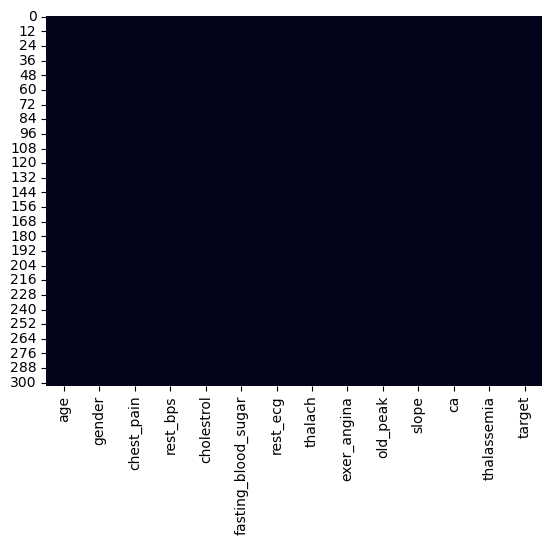

In [12]:
#To visualise null values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [13]:
#Droping rows with less missing values
df.dropna(axis=0, inplace=True)

In [14]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')


## EDA - Exploratory Data Analysis

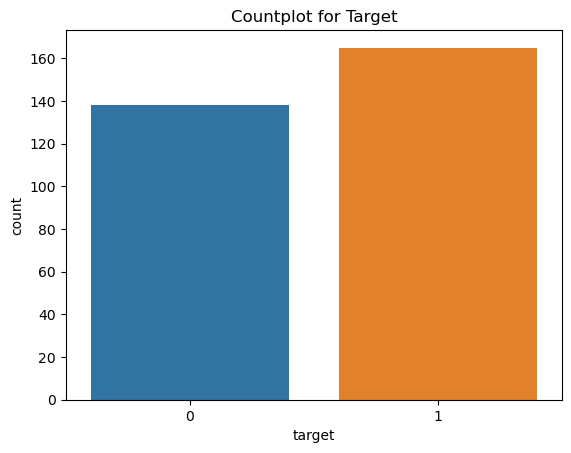

In [15]:
#To display countplot of target variable
sns.countplot(x=df['target'])
plt.title('Countplot for Target')
plt.show()

In [16]:
#To display basic statistical values for numeric columns
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
#Univariate analysis

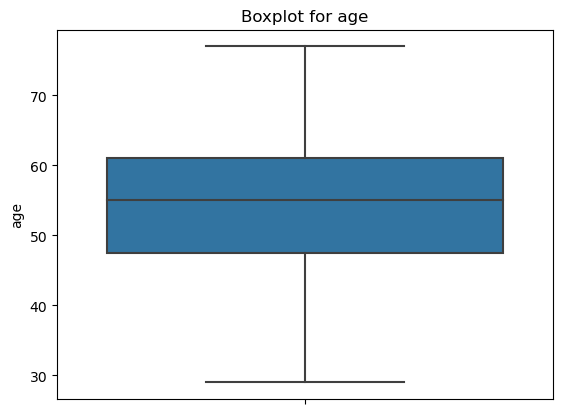

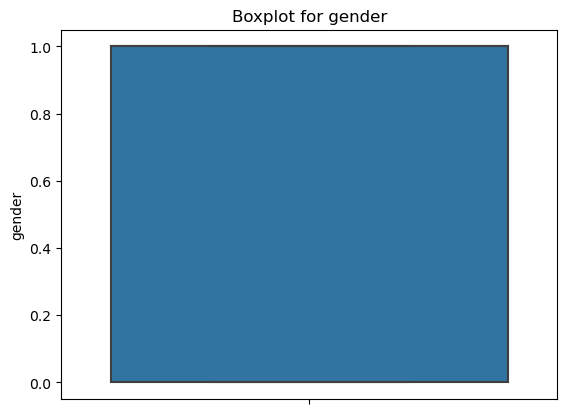

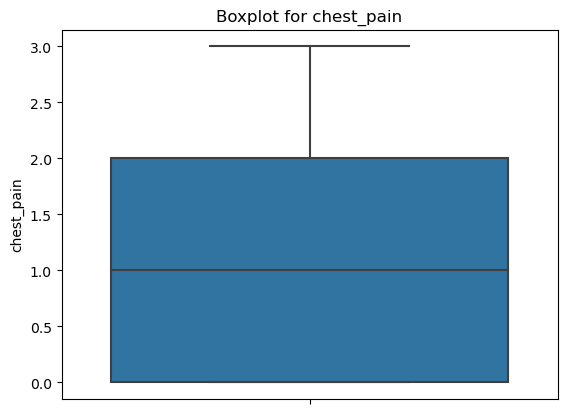

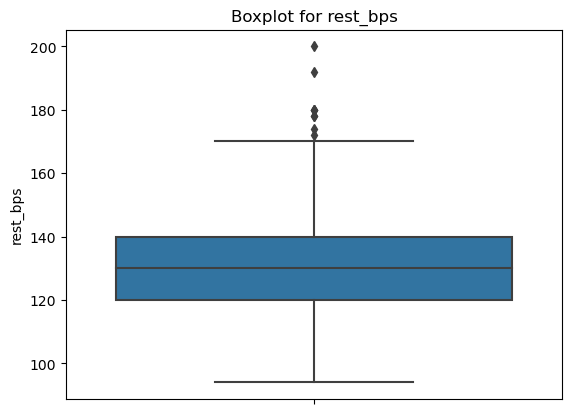

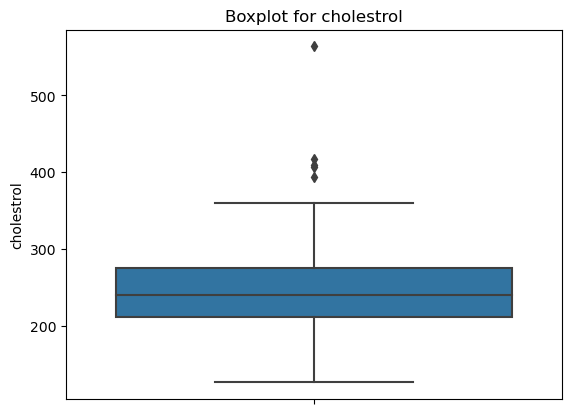

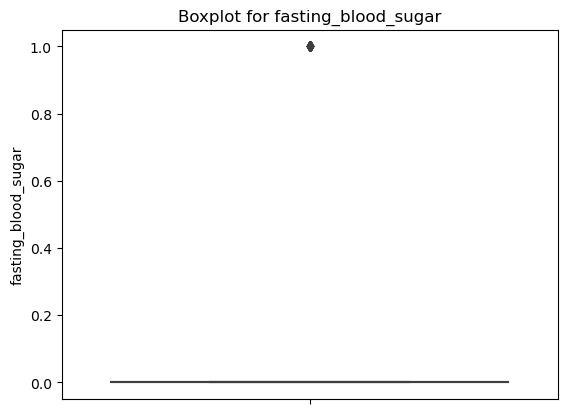

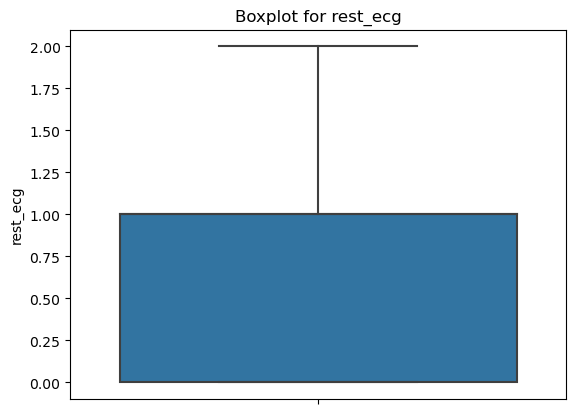

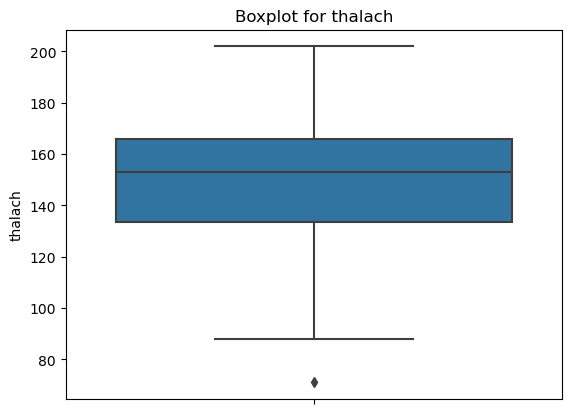

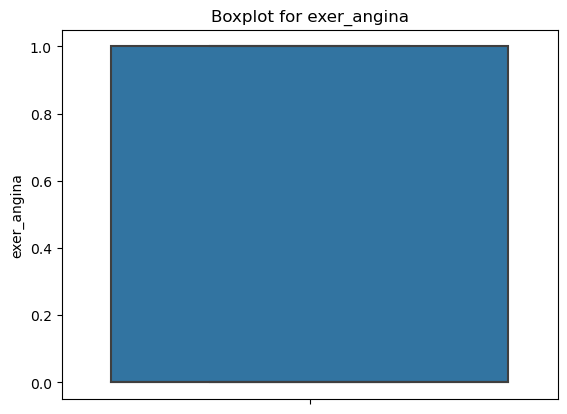

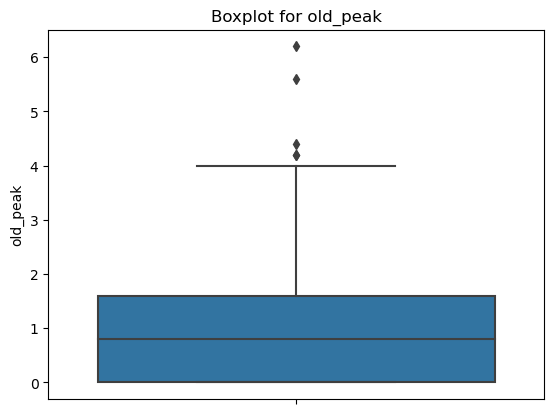

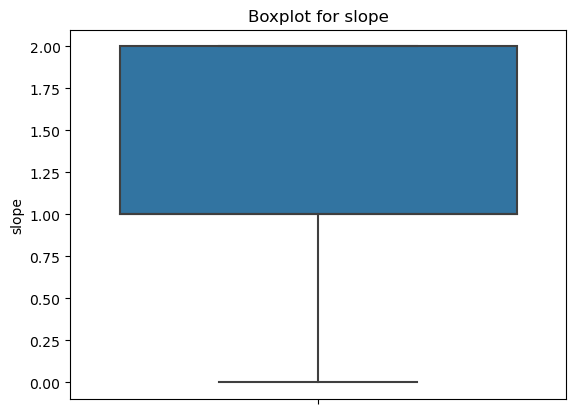

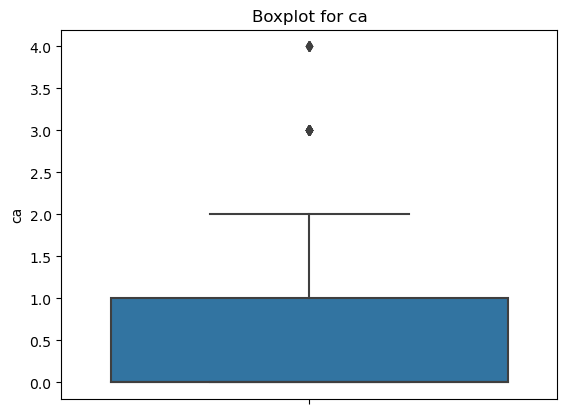

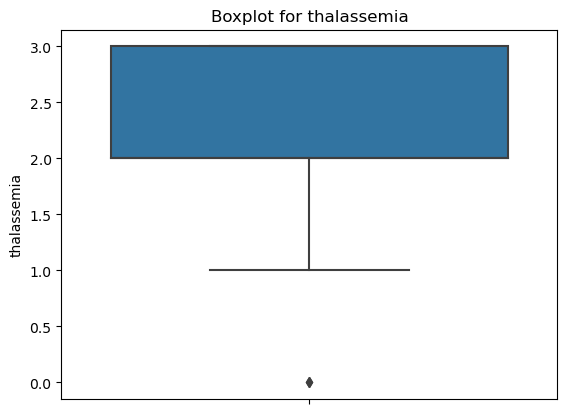

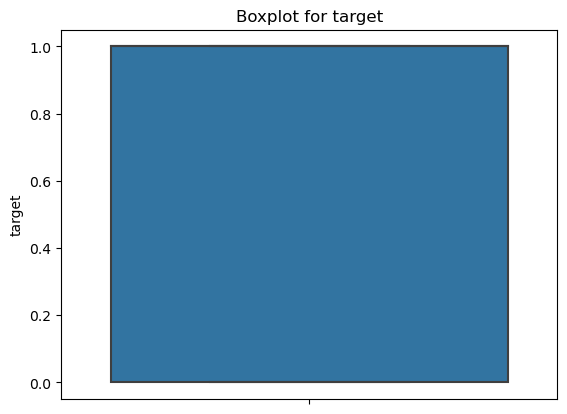

In [18]:
#To display box plot for all numeric columns
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [19]:
#Bi-Variate Analysis

In [20]:
#To display pair plot between two numeric columns
#sns.pairplot(df,vars=num_cols)
#plt.show()

In [21]:
#To display box plot between numeric and categorical columns
for i in cat_cols:
    sns.boxplot(y=df[i],x=df['Dependent_column'])
    plt.title(f'Boxplot of {i} VS SalePrice')
    plt.show()

In [22]:
#Multi-variate Analysis

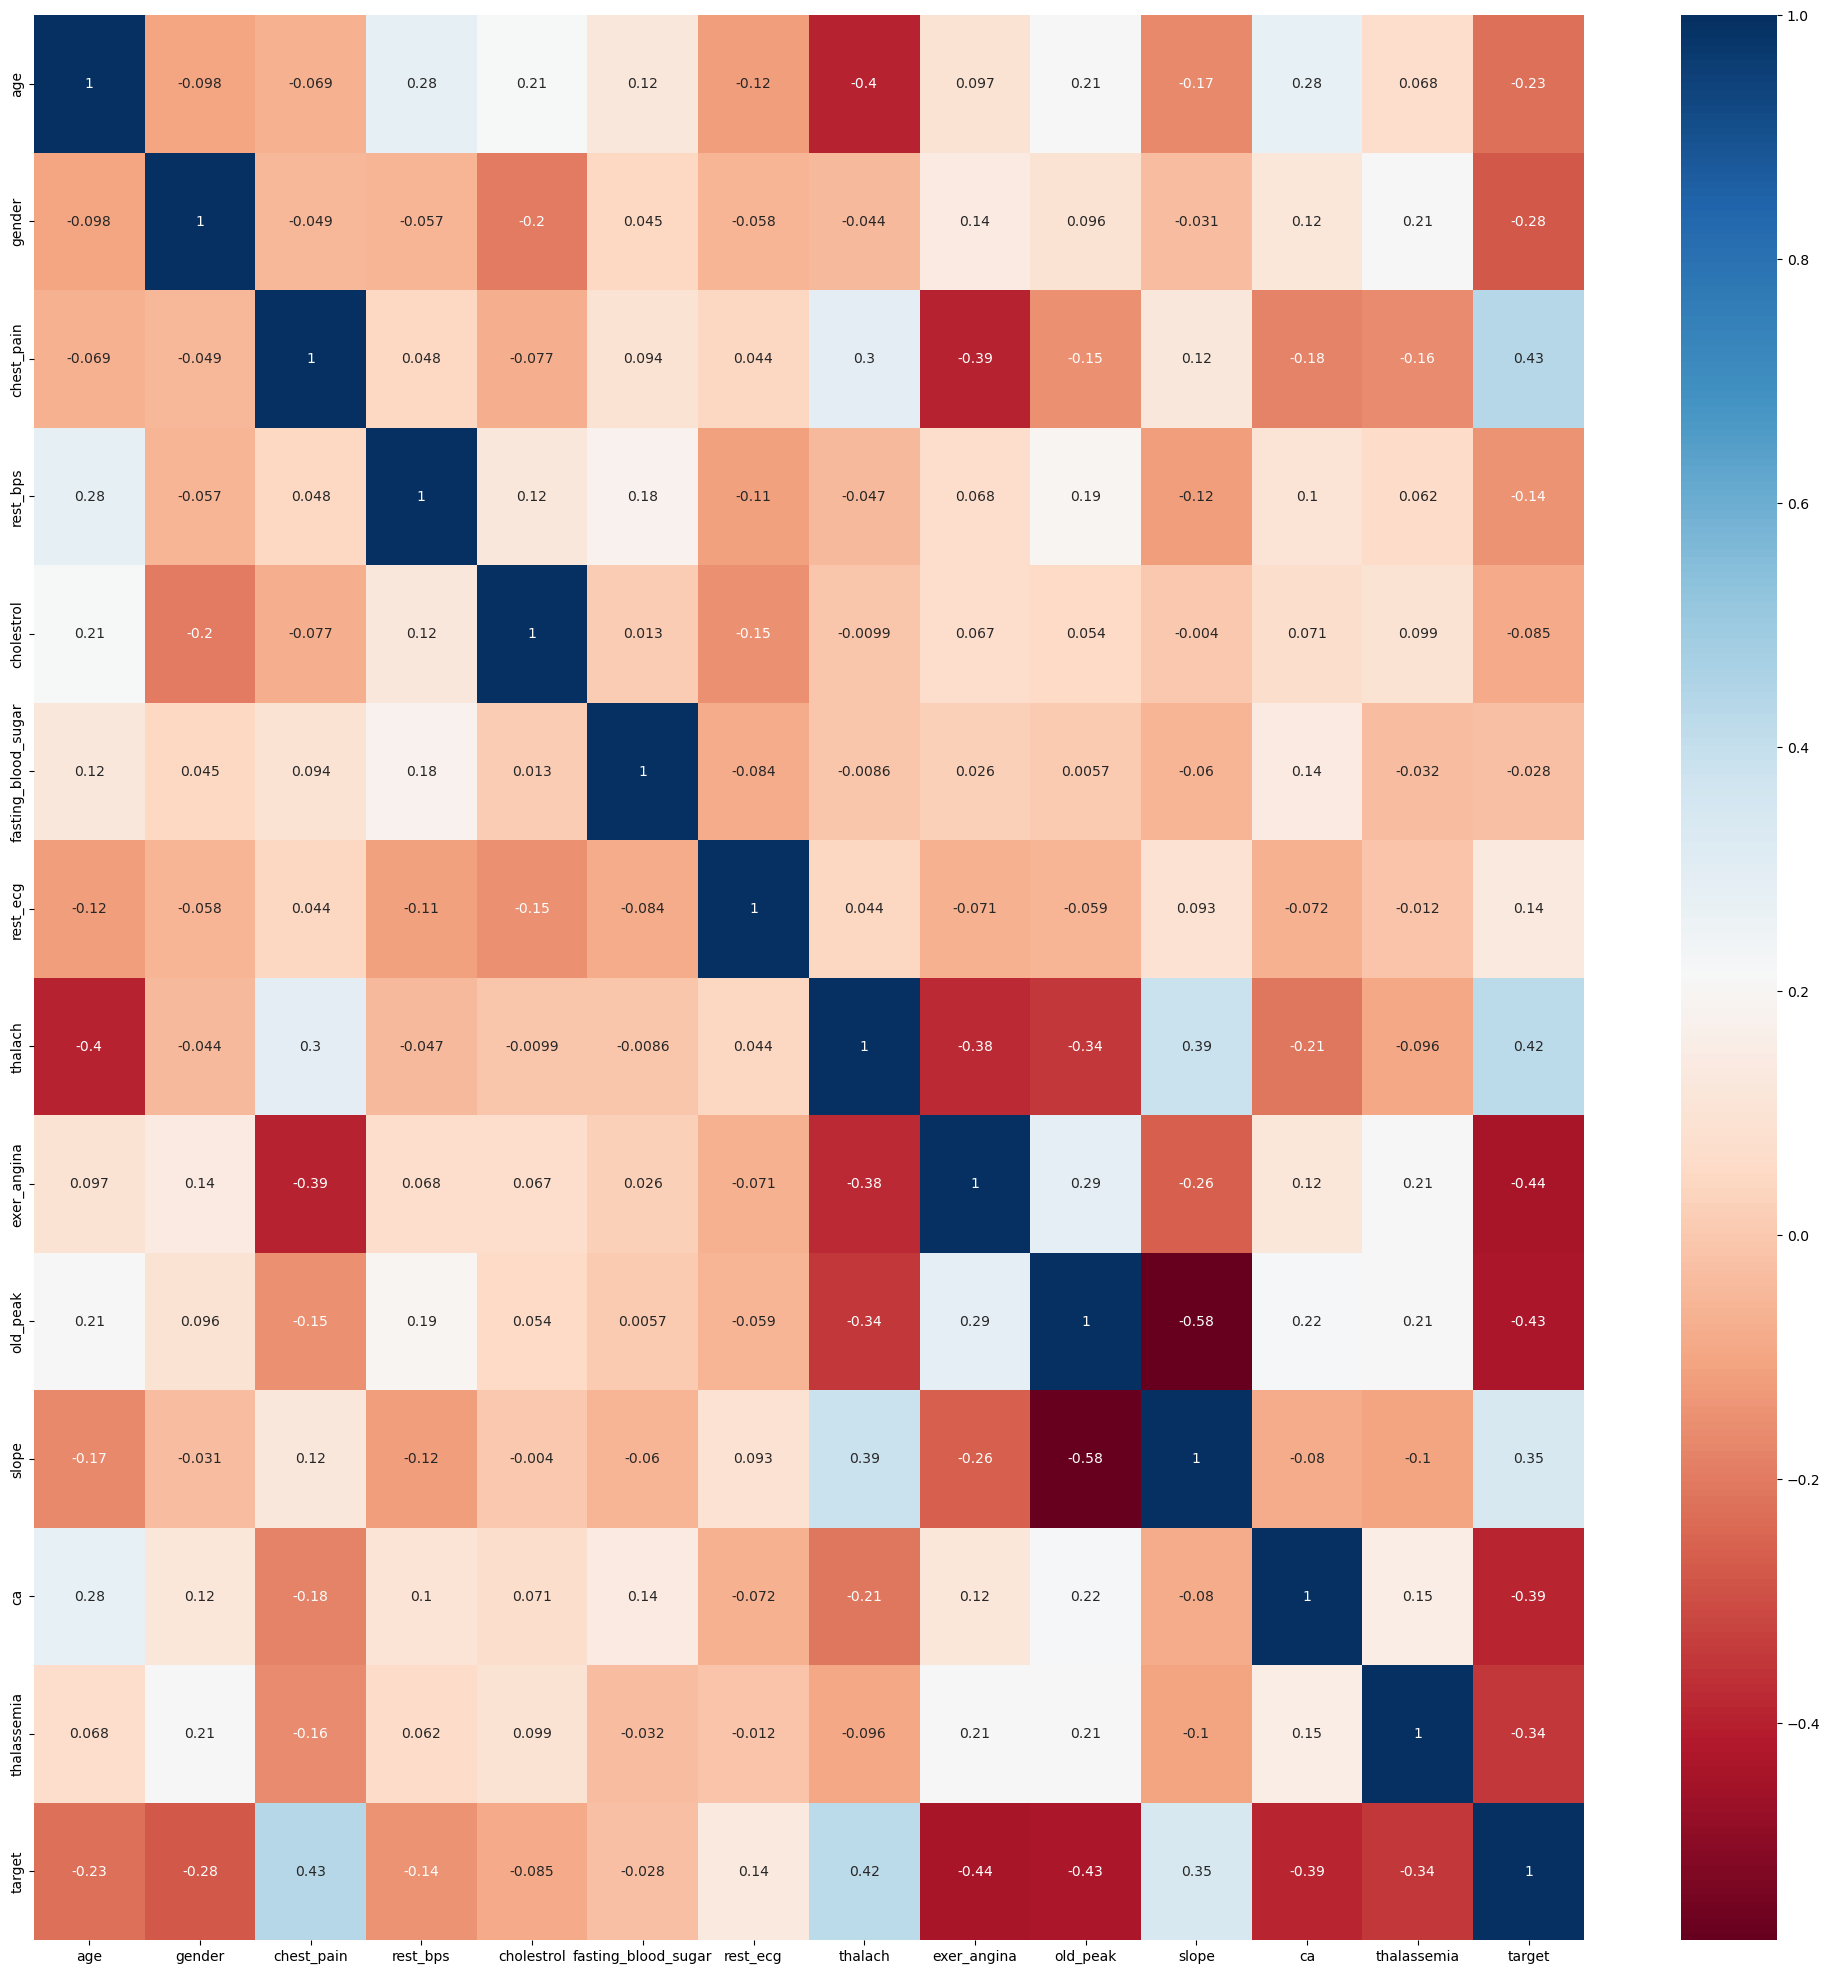

In [23]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

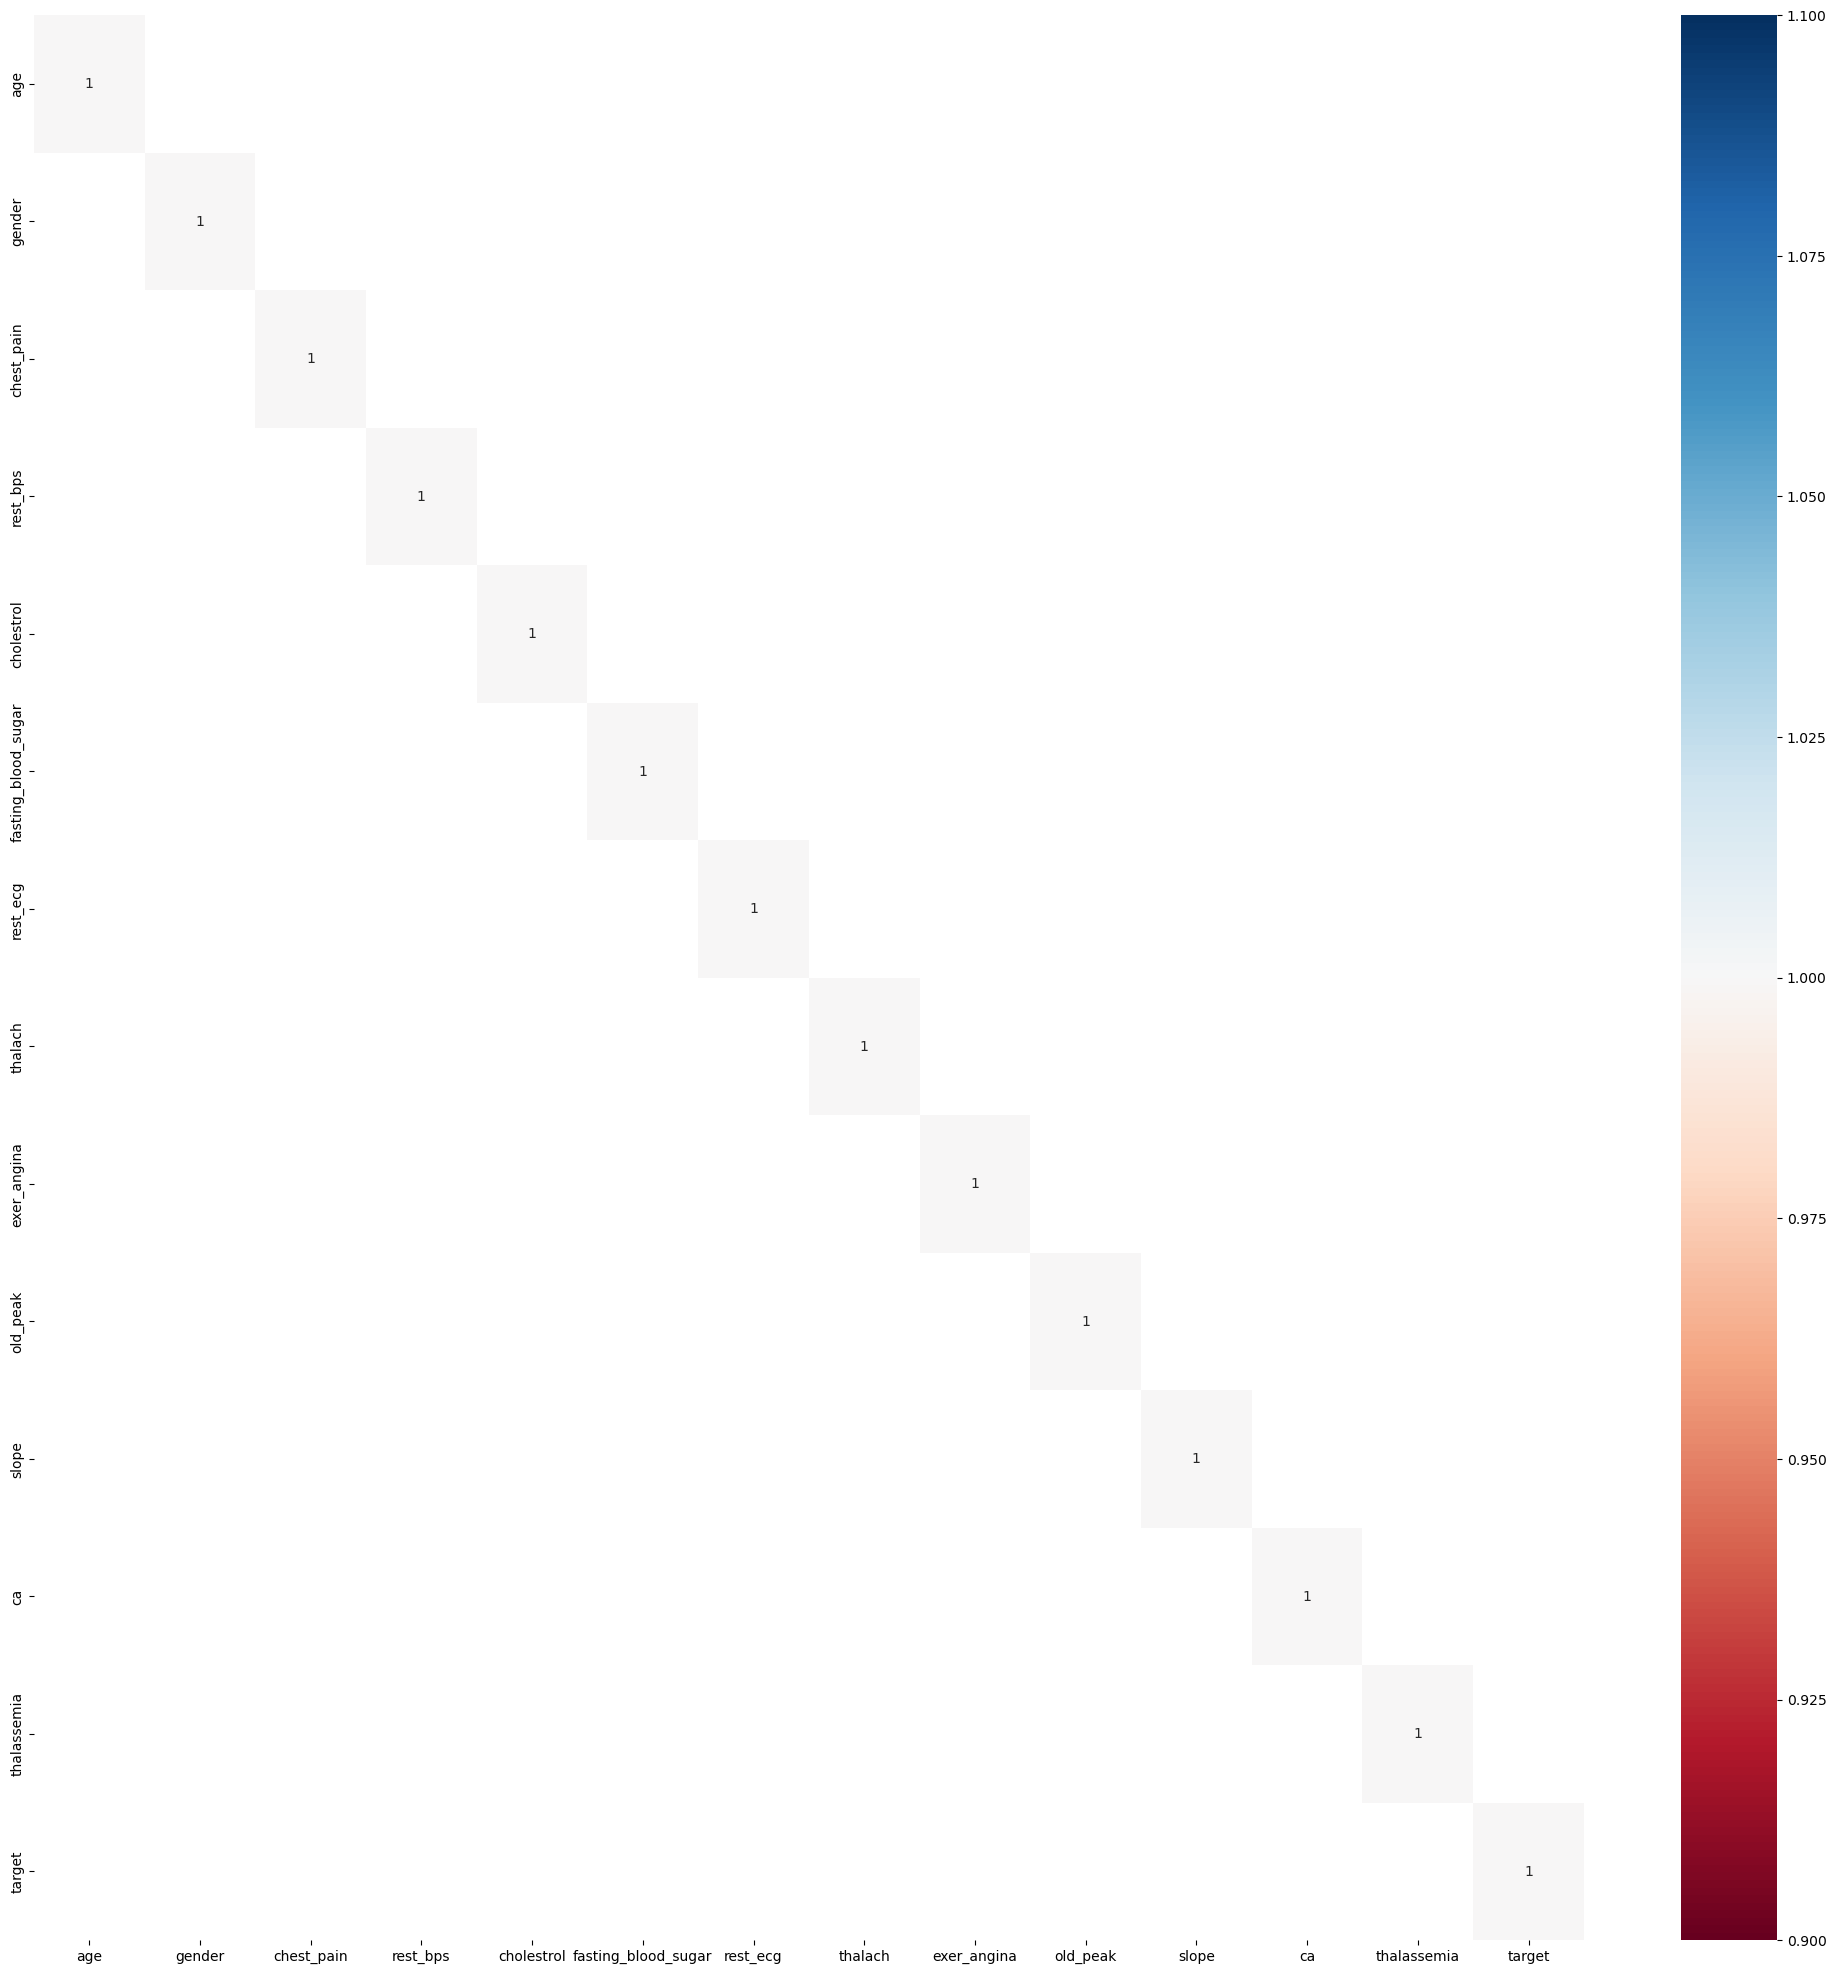

In [24]:
#To display columns that have high correlation(more than 70%)
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7], annot=True, cmap='RdBu')
plt.show()

### Inference
1) Female patients are more affected by heart disease.<br>
2) Chest Pain intensity 2 patients are more affected by heart disease.

In [25]:
#Outlier Treatment

In [26]:
df.describe(percentiles=[0.01,0.03,0.05,0.10,0.90,0.95,0.97,0.99]).T

,count,mean,std,min,1%,3%,5%,10%,50%,90%,95%,97%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,38.00,39.1,42.0,55.0,66.0,68.0,69.94,71.00,77.0
gender,303.0,0.683168,0.466011,0.0,0.00,0.00,0.0,0.0,1.0,1.0,1.0,1.00,1.00,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.00,0.00,0.0,0.0,1.0,2.0,3.0,3.00,3.00,3.0
rest_bps,303.0,131.623762,17.538143,94.0,100.00,104.06,108.0,110.0,130.0,152.0,160.0,170.00,180.00,200.0
cholestrol,303.0,246.264026,51.830751,126.0,149.00,167.06,175.0,188.0,240.0,308.8,326.9,340.94,406.74,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.0,0.0,1.0,1.0,1.0,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,103.12,108.1,116.0,153.0,176.6,181.9,184.94,191.96,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.00,1.00,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.0,0.0,0.8,2.8,3.4,3.60,4.20,6.2


In [27]:
df['old_peak'] = np.where(df['old_peak']>4.2,4.2,df['old_peak'])
df['rest_bps'] = np.where(df['rest_bps']>170.00,170.00,df['rest_bps'])
df['cholestrol'] = np.where(df['cholestrol']>353.98,353.98,df['cholestrol'])

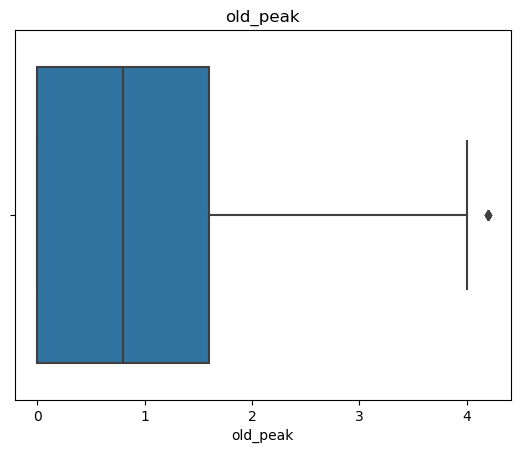

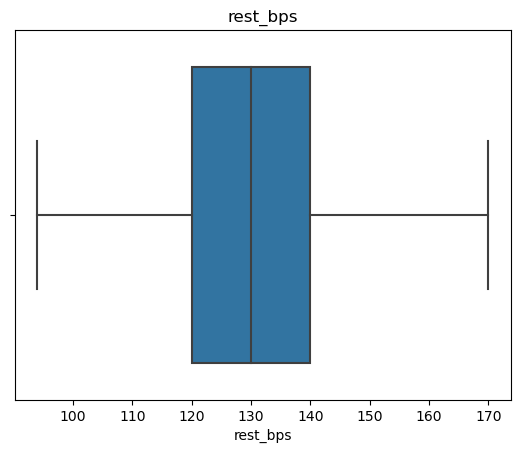

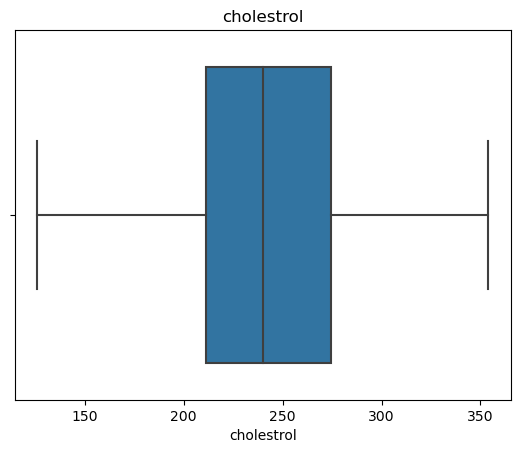

In [28]:
for i in ['old_peak','rest_bps','cholestrol']:
    sns.boxplot(x=df[i])
    plt.title(f'{i}')
    plt.show()

# Model building

In [29]:
#Select the Dependent and Independent Features
x = df.drop('target',axis=1)
y = df['target']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(303, 13) (303,)


In [30]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [31]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [32]:
# Createing Function to evalute the model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, kappa, f1
    
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
        
    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')
    
    print('Accuracy_Score is', round(acc,4))
    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('kappa Score is:', round(kappa,4))
    print('fScore is:', round(f1,4))
        
    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    
    print(classification_report(y_test,y_pred))
    
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [34]:
def plot_roc_auc(model,y_test,ypred_proba):
    global auc
    fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1])
    auc = roc_auc_score(y_test,ypred_proba[:,1])
    print('AUC:',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

In [35]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'AUC Score' , 'Precision Score', 
                                   'Recall Score', 'Accuracy Score', 
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 
                                    'Test Score': test_score,
                                     'AUC Score' : auc,
                                    'Precision Score': precision, 
                                    'Recall Score': recall, 'Accuracy Score': acc, 
                                    'Kappa Score': kappa, 'f1-score': f1}, ignore_index = True)
    return(score_card)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression


Training Score is: 88.68 %
Testing Score is: 81.32000000000001 %

Accuracy_Score is 0.8132
precision Score is: 0.7778
Recall Score is: 0.8936
kappa Score is: 0.6241
fScore is: 0.8317

Confusion Matrix is
 [[32 12]
 [ 5 42]]

Predictions:
 [1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



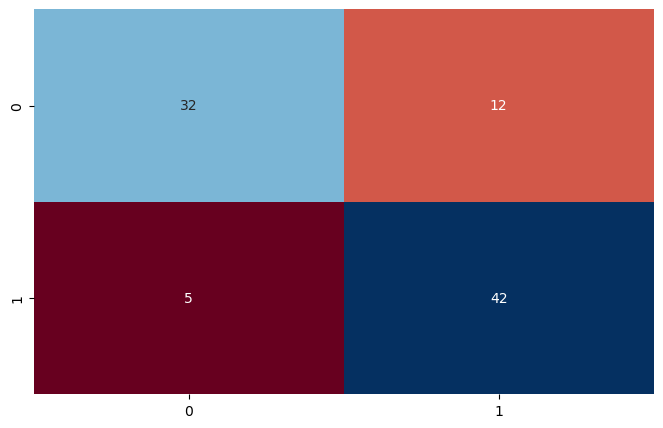

In [37]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [38]:
ypred_proba_lr = lr.predict_proba(x_test)
print(len(ypred_proba_lr))
print(ypred_proba_lr[:10])

91
[[0.23698297 0.76301703]
 [0.40293876 0.59706124]
 [0.03605816 0.96394184]
 [0.97580095 0.02419905]
 [0.45392161 0.54607839]
 [0.92183851 0.07816149]
 [0.23446035 0.76553965]
 [0.96726047 0.03273953]
 [0.79261856 0.20738144]
 [0.97825843 0.02174157]]


AUC: 0.8578336557059961


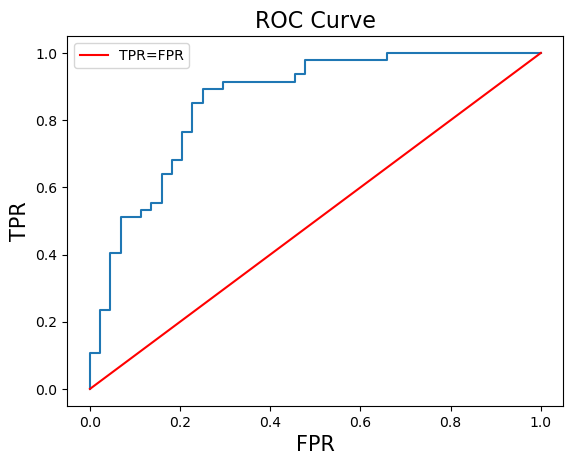

In [39]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_proba_lr)

In [40]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

22
0.5449061897394647


In [41]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683


# Logistic Regression using SGD


Training Score is: 71.23 %
Testing Score is: 74.72999999999999 %

Accuracy_Score is 0.7473
precision Score is: 0.7069
Recall Score is: 0.8723
kappa Score is: 0.4899
fScore is: 0.781

Confusion Matrix is
 [[27 17]
 [ 6 41]]

Predictions:
 [1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        44
           1       0.71      0.87      0.78        47

    accuracy                           0.75        91
   macro avg       0.76      0.74      0.74        91
weighted avg       0.76      0.75      0.74        91



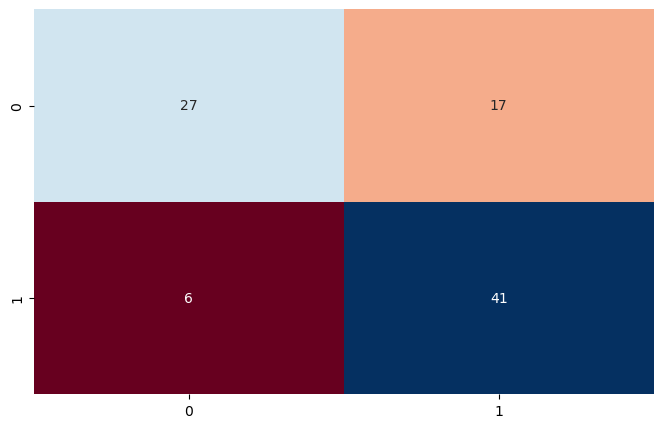

In [42]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

In [43]:
ypred_proba_lr_SGD = lr.predict_proba(x_test)
print(len(ypred_proba_lr_SGD))
print(ypred_proba_lr_SGD[:10])

91
[[0.23698297 0.76301703]
 [0.40293876 0.59706124]
 [0.03605816 0.96394184]
 [0.97580095 0.02419905]
 [0.45392161 0.54607839]
 [0.92183851 0.07816149]
 [0.23446035 0.76553965]
 [0.96726047 0.03273953]
 [0.79261856 0.20738144]
 [0.97825843 0.02174157]]


AUC: 0.8578336557059961


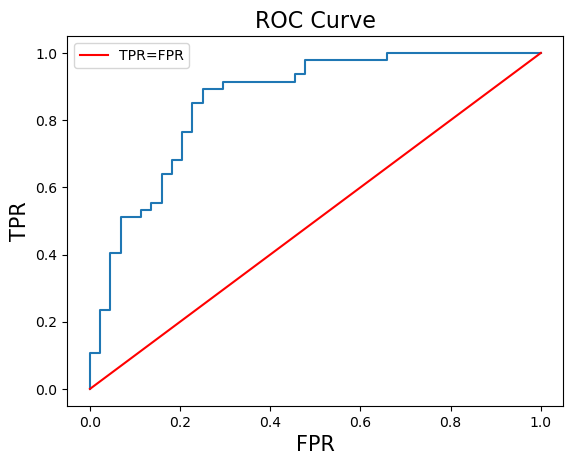

In [44]:
fpr_lr2,tpr_lr2,thresh_lr2 = plot_roc_auc(lr_SGD,y_test,ypred_proba_lr_SGD)

In [45]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952


# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 76.92 %

Accuracy_Score is 0.7692
precision Score is: 0.7407
Recall Score is: 0.8511
kappa Score is: 0.5356
fScore is: 0.7921

Confusion Matrix is
 [[30 14]
 [ 7 40]]

Predictions:
 [1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.74      0.85      0.79        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



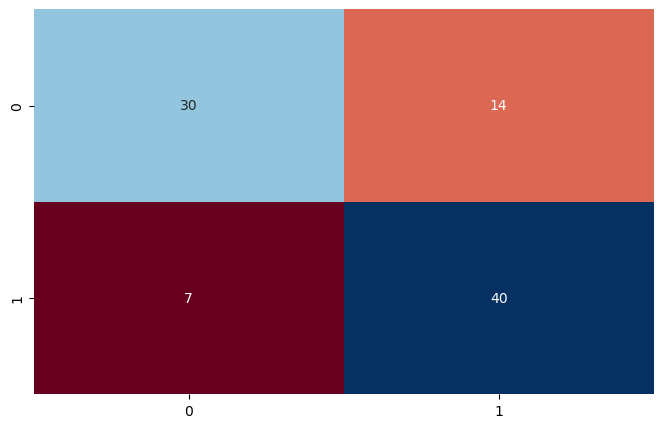

In [46]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [47]:
ypred_proba_dt1 = dt1.predict_proba(x_test)

AUC: 0.766441005802708


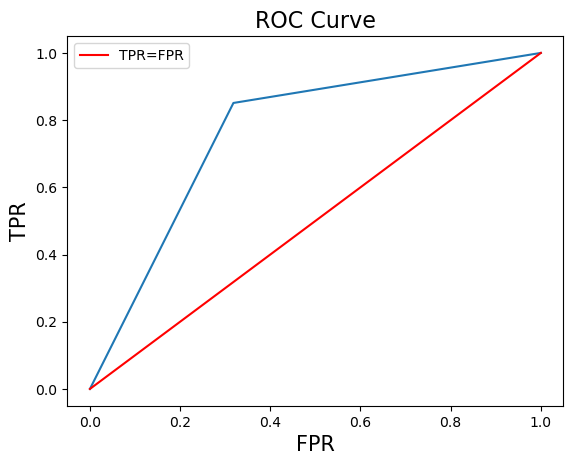

In [48]:
fpr_dt1,tpr_dt1,thresh_dt1 = plot_roc_auc(dt1,y_test,ypred_proba_dt1)

In [49]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079


# Decision Tree with Pruning

In [50]:
tuned_paramaters = [ {'criterion':['gini','entropy'],
                      'max_depth':[8,9,10,11,12,14], 
                      'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 20} 




Training Score is: 87.74 %
Testing Score is: 73.63 %

Accuracy_Score is 0.7363
precision Score is: 0.717
Recall Score is: 0.8085
kappa Score is: 0.4696
fScore is: 0.76

Confusion Matrix is
 [[29 15]
 [ 9 38]]

Predictions:
 [1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        44
           1       0.72      0.81      0.76        47

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91



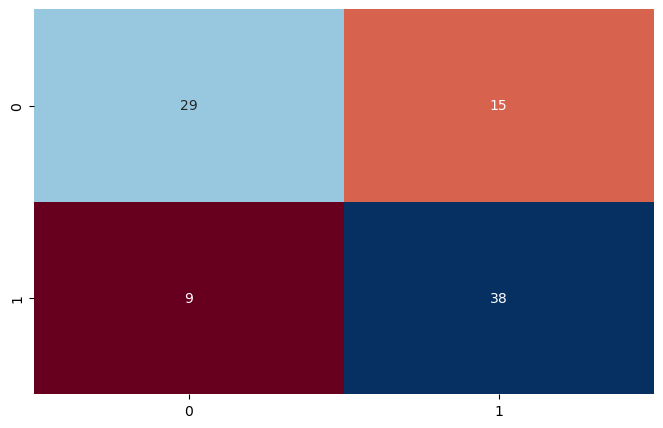

In [51]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=8, min_samples_split=20)
eval_model(dt2,x_train,x_test,y_train,y_test)

In [52]:
ypred_proba_dt2 = dt2.predict_proba(x_test)

AUC: 0.7688588007736943


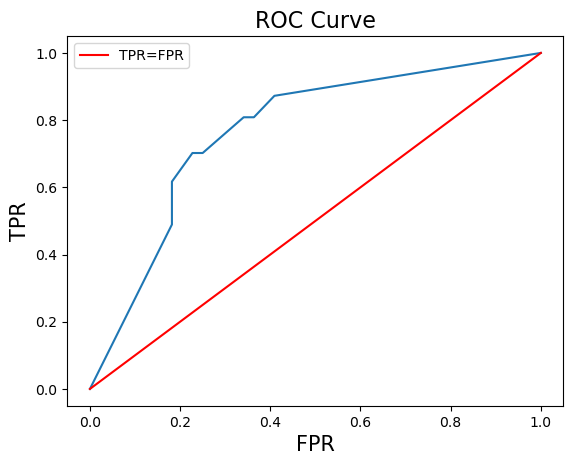

In [53]:
fpr_dt2,tpr_dt2,thresh_dt2 = plot_roc_auc(dt2,y_test,ypred_proba_dt2)

In [54]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000


# Ensemble Learning

## Bagging Classifier


Training Score is: 99.06 %
Testing Score is: 75.82 %

Accuracy_Score is 0.7582
precision Score is: 0.7551
Recall Score is: 0.7872
kappa Score is: 0.5153
fScore is: 0.7708

Confusion Matrix is
 [[32 12]
 [10 37]]

Predictions:
 [1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        44
           1       0.76      0.79      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



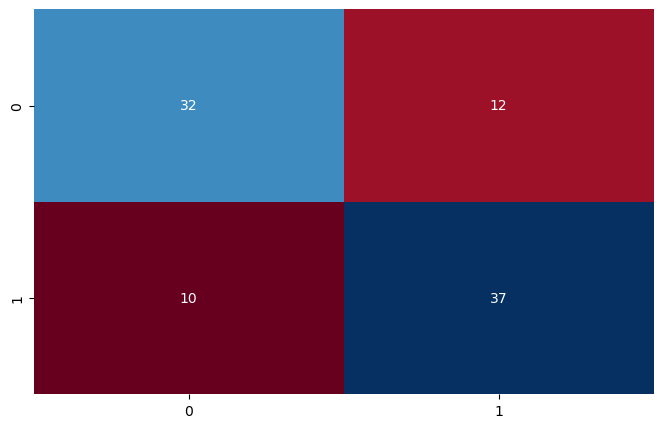

In [55]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [56]:
ypred_proba_bag = bag.predict_proba(x_test)

AUC: 0.8583172147001934


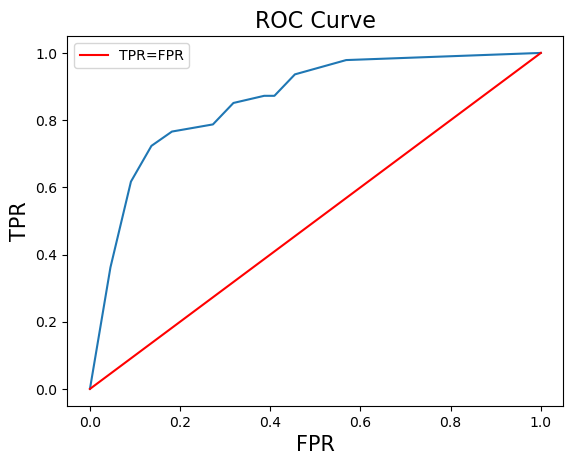

In [57]:
fpr_bag,tpr_bag,thresh_bag = plot_roc_auc(bag,y_test,ypred_proba_bag)

In [58]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833


# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 73.63 %

Accuracy_Score is 0.7363
precision Score is: 0.717
Recall Score is: 0.8085
kappa Score is: 0.4696
fScore is: 0.76

Confusion Matrix is
 [[29 15]
 [ 9 38]]

Predictions:
 [1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        44
           1       0.72      0.81      0.76        47

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91



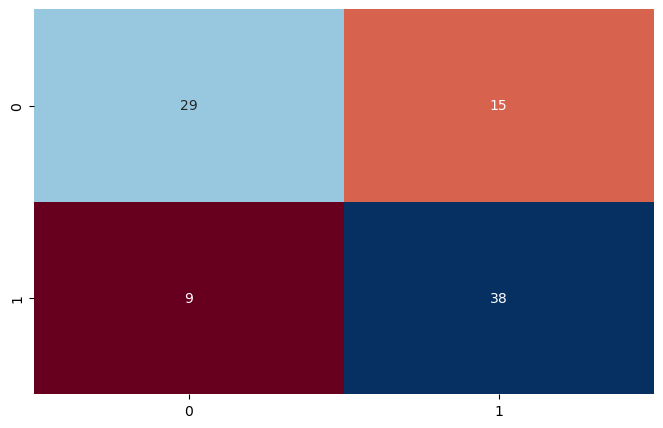

In [59]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [60]:
ypred_proba_adaboost = adaboost.predict_proba(x_test)

AUC: 0.7338007736943908


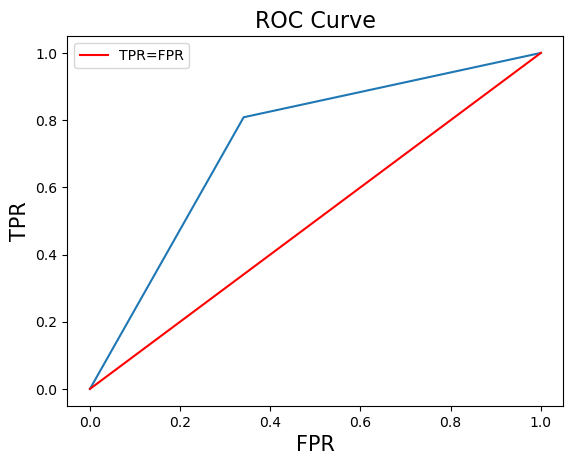

In [61]:
fpr_adaboost,tpr_adaboost,thresh_adaboost = plot_roc_auc(adaboost,y_test,ypred_proba_adaboost)

In [62]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000


# XGBoost Classifier


Training Score is: 93.4 %
Testing Score is: 78.02 %

Accuracy_Score is 0.7802
precision Score is: 0.7755
Recall Score is: 0.8085
kappa Score is: 0.5593
fScore is: 0.7917

Confusion Matrix is
 [[33 11]
 [ 9 38]]

Predictions:
 [1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.78      0.81      0.79        47

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



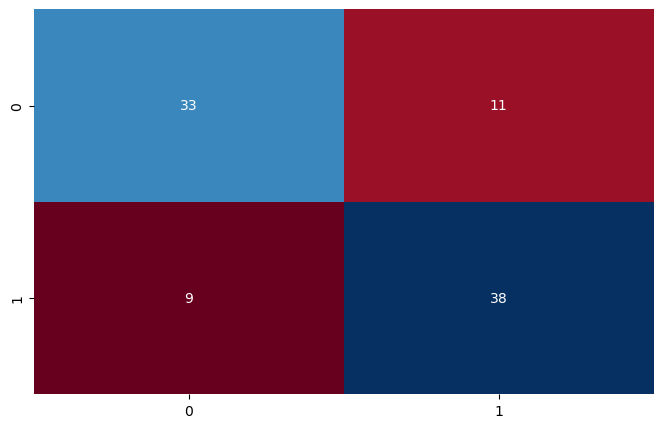

In [63]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [64]:
ypred_proba_xgbm = xgbm.predict_proba(x_test)

AUC: 0.808752417794971


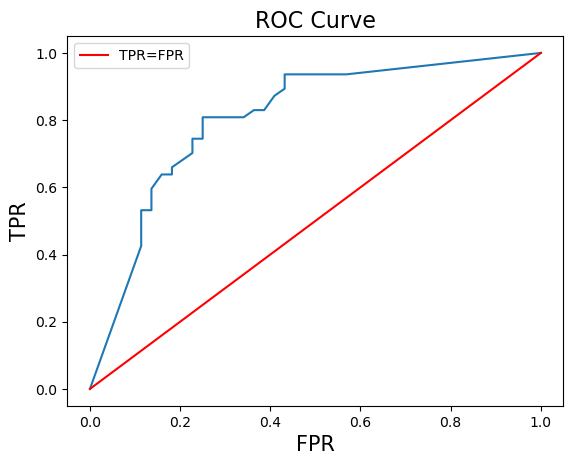

In [65]:
fpr_xgbm,tpr_xgbm,thresh_xgbm = plot_roc_auc(xgbm,y_test,ypred_proba_xgbm)

In [66]:
ypred_proba_adaboost = xgbm.predict_proba(x_test)

In [67]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667


# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 76.92 %

Accuracy_Score is 0.7692
precision Score is: 0.76
Recall Score is: 0.8085
kappa Score is: 0.537
fScore is: 0.7835

Confusion Matrix is
 [[32 12]
 [ 9 38]]

Predictions:
 [1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



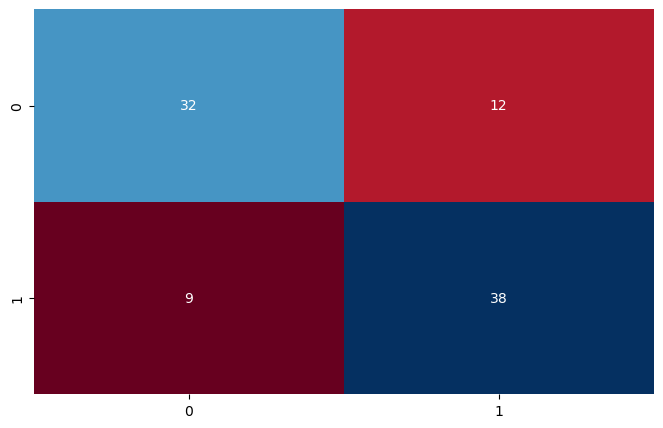

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [69]:
ypred_proba_rf = rf.predict_proba(x_test)

AUC: 0.8638781431334623


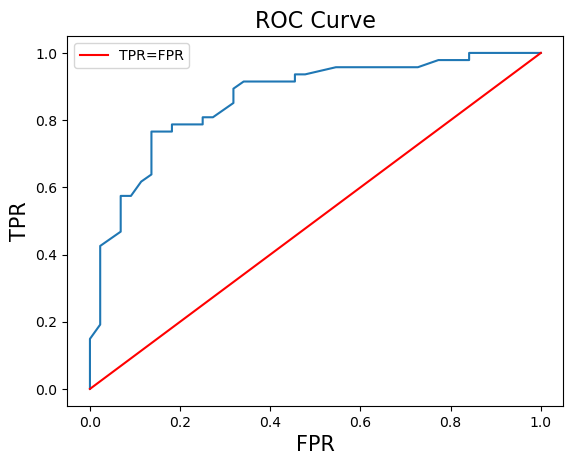

In [70]:
fpr_rf,tpr_rf,thresh_rf = plot_roc_auc(rf,y_test,ypred_proba_rf)

In [71]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505


# Random Forest with Pruning

In [72]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20], 
                     'max_depth': [8, 10], 
                     'min_samples_leaf': [5,10], 
                     'max_leaf_nodes': [10, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest regressor: ', rf_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100} 




Training Score is: 91.03999999999999 %
Testing Score is: 81.32000000000001 %

Accuracy_Score is 0.8132
precision Score is: 0.7885
Recall Score is: 0.8723
kappa Score is: 0.6246
fScore is: 0.8283

Confusion Matrix is
 [[33 11]
 [ 6 41]]

Predictions:
 [1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



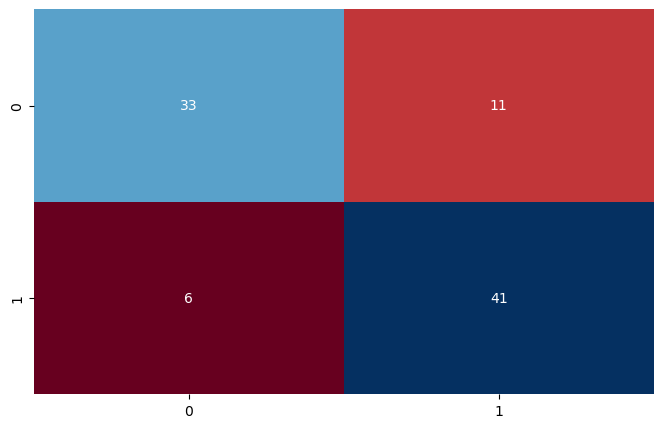

In [73]:
rf2 = RandomForestClassifier(max_depth=8, 
                            max_leaf_nodes=10, 
                            min_samples_leaf=5,
                            min_samples_split=15,
                            n_estimators=100)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [74]:
ypred_proba_rf2 = rf2.predict_proba(x_test)

AUC: 0.870889748549323


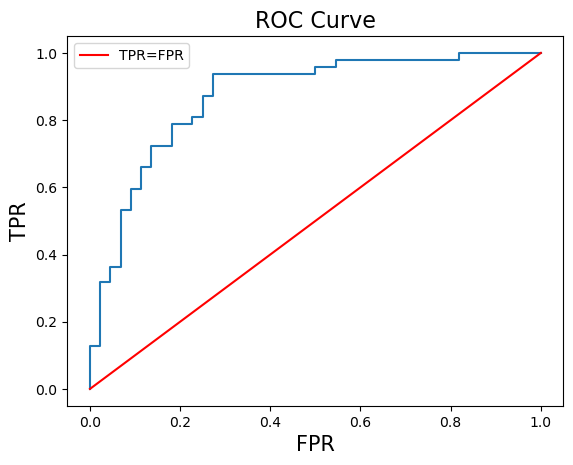

In [75]:
fpr_rf2,tpr_rf2,thresh_rf2 = plot_roc_auc(rf2,y_test,ypred_proba_rf2)


In [76]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283


# Support Vector Classifier

### SVM using linear kernel


Training Score is: 90.09 %
Testing Score is: 79.12 %

Accuracy_Score is 0.7912
precision Score is: 0.7692
Recall Score is: 0.8511
kappa Score is: 0.5804
fScore is: 0.8081

Confusion Matrix is
 [[32 12]
 [ 7 40]]

Predictions:
 [1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        44
           1       0.77      0.85      0.81        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



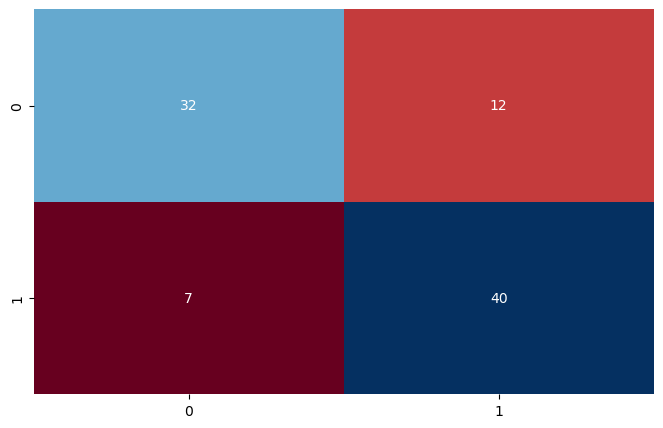

In [77]:
sv_linear= SVC(kernel='linear')
eval_model(sv_linear,x_train,x_test,y_train,y_test)

In [78]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


### SVM using Gaussian kernel


Training Score is: 64.62 %
Testing Score is: 63.739999999999995 %

Accuracy_Score is 0.6374
precision Score is: 0.5972
Recall Score is: 0.9149
kappa Score is: 0.2605
fScore is: 0.7227

Confusion Matrix is
 [[15 29]
 [ 4 43]]

Predictions:
 [1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.79      0.34      0.48        44
           1       0.60      0.91      0.72        47

    accuracy                           0.64        91
   macro avg       0.69      0.63      0.60        91
weighted avg       0.69      0.64      0.60        91



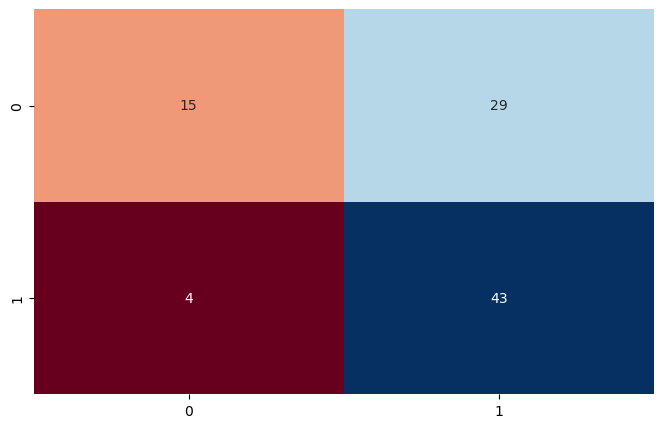

In [79]:
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [80]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


### SVM using Sigmoid kernel


Training Score is: 55.66 %
Testing Score is: 51.65 %

Accuracy_Score is 0.5165
precision Score is: 0.5165
Recall Score is: 1.0
kappa Score is: 0.0
fScore is: 0.6812

Confusion Matrix is
 [[ 0 44]
 [ 0 47]]

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

    accuracy                           0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91



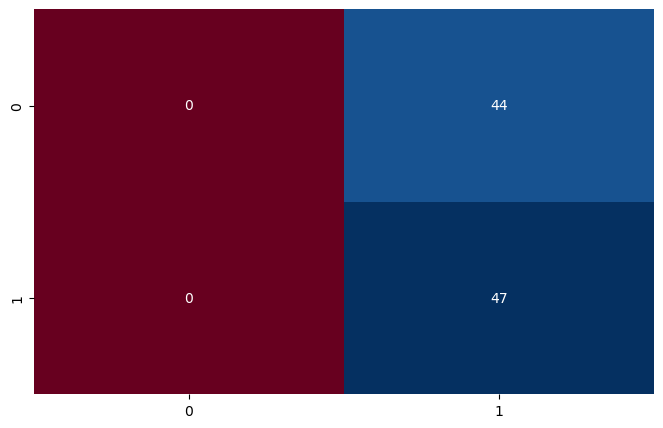

In [81]:
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [82]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


In [83]:
###SVM using Polynomial kernel


Training Score is: 67.45 %
Testing Score is: 68.13 %

Accuracy_Score is 0.6813
precision Score is: 0.6324
Recall Score is: 0.9149
kappa Score is: 0.3521
fScore is: 0.7478

Confusion Matrix is
 [[19 25]
 [ 4 43]]

Predictions:
 [1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.63      0.91      0.75        47

    accuracy                           0.68        91
   macro avg       0.73      0.67      0.66        91
weighted avg       0.73      0.68      0.66        91



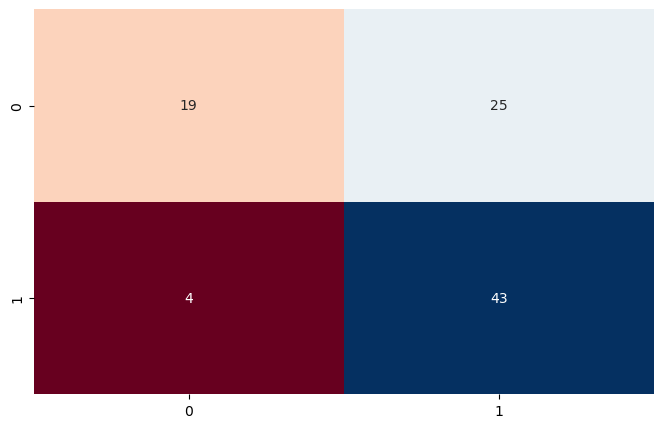

In [84]:
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [85]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


### SVM using Polynomial kernel and degree of polynomial 2


Training Score is: 86.32 %
Testing Score is: 74.72999999999999 %

Accuracy_Score is 0.7473
precision Score is: 0.75
Recall Score is: 0.766
kappa Score is: 0.4936
fScore is: 0.7579

Confusion Matrix is
 [[32 12]
 [11 36]]

Predictions:
 [0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        44
           1       0.75      0.77      0.76        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



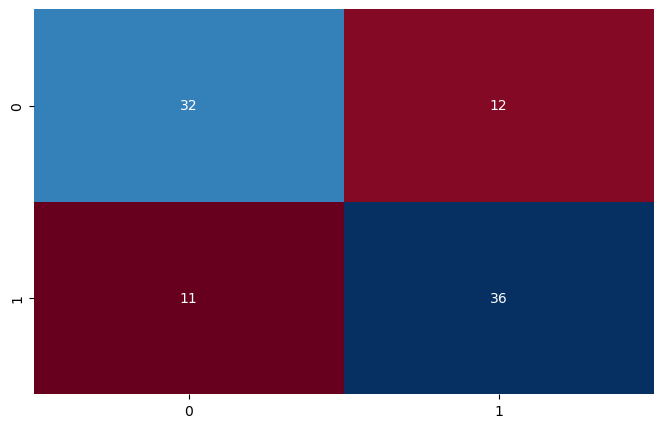

In [86]:
sv_poly2= SVC(kernel='poly', degree = 2, gamma = 'auto')
eval_model(sv_poly2,x_train,x_test,y_train,y_test)

In [87]:
update_score_card(model_name = 'Support Vector using Polynomial degree 2')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


### SVM using Polynomial kernel  using GridSearchCV

In [88]:
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'C': 1, 'degree': 2, 'gamma': 'scale'} 




Training Score is: 67.92 %
Testing Score is: 65.93 %

Accuracy_Score is 0.6593
precision Score is: 0.6143
Recall Score is: 0.9149
kappa Score is: 0.3064
fScore is: 0.735

Confusion Matrix is
 [[17 27]
 [ 4 43]]

Predictions:
 [1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0]
              precision    recall  f1-score   support

           0       0.81      0.39      0.52        44
           1       0.61      0.91      0.74        47

    accuracy                           0.66        91
   macro avg       0.71      0.65      0.63        91
weighted avg       0.71      0.66      0.63        91



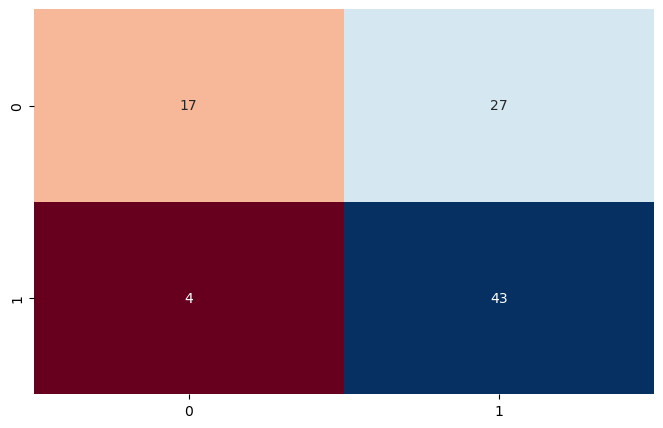

In [89]:
sv_poly_cv= SVC(kernel='poly', C=1, degree=2, gamma='scale')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [90]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081


# Model Comparision

In [91]:
score_card

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.886792,0.813187,0.857834,0.777778,0.893617,0.813187,0.624058,0.831683
1,Logistic Regression using SGD,0.712264,0.747253,0.857834,0.706897,0.872340,0.747253,0.489885,0.780952
2,Decision Tree Classifier,1.000000,0.769231,0.766441,0.740741,0.851064,0.769231,0.535601,0.792079
3,Decision Tree with Pruning,0.877358,0.736264,0.768859,0.716981,0.808511,0.736264,0.469645,0.760000
4,Bagging Ensemble,0.990566,0.758242,0.858317,0.755102,0.787234,0.758242,0.515254,0.770833
5,Adaboost Ensemble,1.000000,0.736264,0.733801,0.716981,0.808511,0.736264,0.469645,0.760000
6,XG Boost Ensemble,0.933962,0.780220,0.808752,0.775510,0.808511,0.780220,0.559322,0.791667
7,Random Forest,1.000000,0.769231,0.863878,0.760000,0.808511,0.769231,0.536952,0.783505
8,Random Forest with Pruning,0.910377,0.813187,0.870890,0.788462,0.872340,0.813187,0.624606,0.828283
9,Support Vector using Linear kernel,0.900943,0.791209,0.870890,0.769231,0.851064,0.791209,0.580442,0.808081
